In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def features(df):
    df['total_bytes'] = df.apply(lambda x: x['1->2Bytes'] + x['2->1Bytes'], axis=1)
    df['total_packets'] = df.apply(lambda x: x['1->2Pkts'] + x['1->2Pkts'], axis=1)
    df['index'] = df.index

In [ ]:
#df = df[df['IP2'] == '2607:F8B0:401C:B::C']
#python3.8 network_stats.py -i en0 -s -e bunny.csv -l 2605:e000:1c09:4071:d5e1:462b:7656:5c67 -l 192.168.1.191

### Streaming with VPN

In [106]:
df = pd.read_csv('jeq004_netflix_1080p_1x_vpn_mac_clean_20201101a.csv')
df.head()

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs
0,1604266754,192.168.1.191,63022,137.110.0.70,443,17,244,384,2,2,1604266754836;1604266754837;1604266754852;1604...,192;122;192;122;,2;1;2;1;
1,1604266755,192.168.1.21,5353,224.0.0.251,5353,17,298,0,1,0,1604266755172;,298;,1;
2,1604266755,FE80::CB:868:E287:7DB0,5353,FF02::FB,5353,17,318,0,1,0,1604266755172;,318;,1;
3,1604266755,192.168.1.191,63022,137.110.0.70,443,17,946,432,4,2,1604266755355;1604266755379;1604266755434;1604...,209;209;216;264;216;264;,1;1;2;1;2;1;
4,1604266755,192.168.1.230,54915,192.168.1.255,54915,17,291,0,1,0,1604266755376;,291;,1;


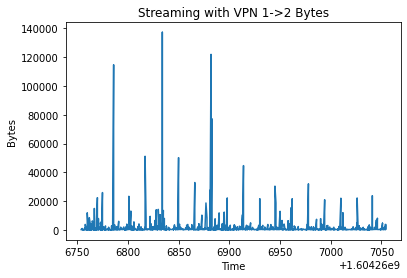

In [104]:
plt.plot(df['Time'], df['1->2Bytes'])
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.title('Streaming with VPN 1->2 Bytes');

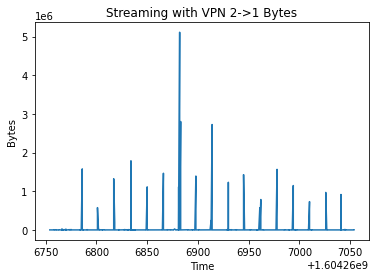

In [105]:
plt.plot(df['Time'], df['2->1Bytes'])
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.title('Streaming with VPN 2->1 Bytes');

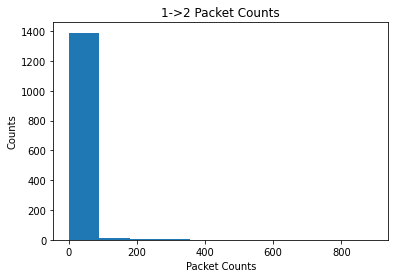

In [58]:
#Packet Counts
plt.hist(df['1->2Pkts'])
plt.ylabel('Counts')
plt.title('1->2 Packet Counts')
plt.xlabel('Packet Counts');

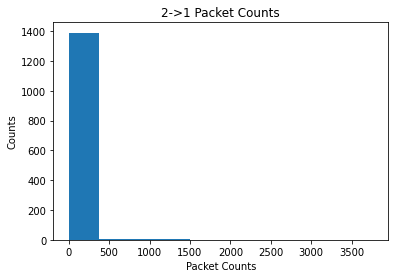

In [57]:
plt.hist(df['2->1Pkts'])
plt.ylabel('Counts')
plt.title('2->1 Packet Counts')
plt.xlabel('Packet Counts');

In [68]:
#Histogram of packet sizes vs direction
def hist_data(df):
    sizes = df['packet_sizes'].values
    dirs = df['packet_dirs'].values
    dir_12 = []
    dir_21 = []
    for i in range(len(sizes)):
        sizes_lst, dirs_lst = sizes[i][:-1].split(';'), dirs[i][:-1].split(';')
        size_dir = list(zip(sizes_lst, dirs_lst))
        #print(size_dir)
        for tup in size_dir:
            if tup[1] == '1':
                dir_12.append(tup[0])
            else:
                dir_21.append(tup[0])
    dir_12 = [eval(i) for i in dir_12]
    dir_21 = [eval(i) for i in dir_21]
    return dir_12, dir_21
dir_12, dir_21 = hist_data(df)

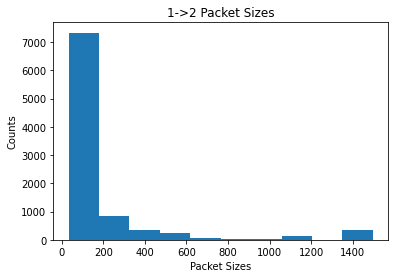

In [69]:
plt.hist(dir_12)
plt.ylabel('Counts')
plt.title('1->2 Packet Sizes')
plt.xlabel('Packet Sizes');


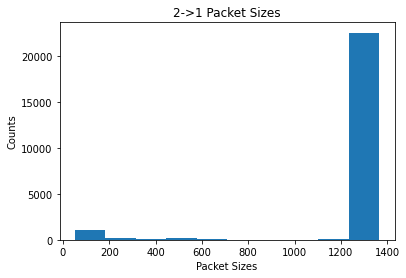

In [43]:
plt.hist(dir_21)
plt.ylabel('Counts')
plt.title('2->1 Packet Sizes')
plt.xlabel('Packet Sizes');

In [98]:
import numpy as np
def packet_time_gaps(row):
    times = row['packet_times']
    times = times[:-1].split(';')
    times = [eval(i) for i in times]
    if len(times) == 1:
        return 0
    diffs = np.diff(times)
    return np.mean(diffs)
df['avg_time_gaps'] = df.apply(packet_time_gaps, axis=1)
df_gaps = df[df['1->2Pkts']+df['2->1Pkts'] > 1]

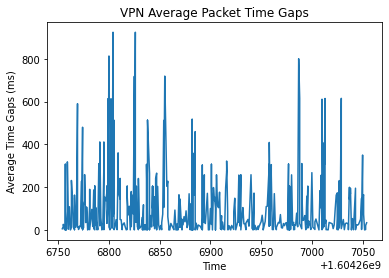

In [103]:
plt.plot(df_gaps['Time'], df_gaps['avg_time_gaps'])
plt.ylabel('Average Time Gaps (ms)')
plt.title('VPN Average Packet Time Gaps')
plt.xlabel('Time');

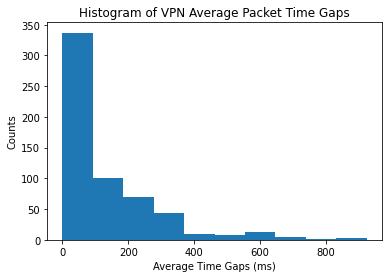

In [107]:
plt.hist(df_gaps['avg_time_gaps'])
plt.xlabel('Average Time Gaps (ms)')
plt.title('Histogram of VPN Average Packet Time Gaps')
plt.ylabel('Counts');

### General Activity (No Streaming) without VPN

In [9]:
df1 = pd.read_csv('1101_general/jeq004_general_internet_novpn_mac_clean_20201101a.csv')
df1

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs
0,1604264588,192.168.1.21,5353,224.0.0.251,5353,17,2911,0,3,0,1604264588098;1604264588100;1604264588712;,1475;138;1298;,1;1;1;
1,1604264588,FE80::CB:868:E287:7DB0,5353,FF02::FB,5353,17,2971,0,3,0,1604264588099;1604264588099;1604264588714;,1495;158;1318;,1;1;1;
2,1604264588,192.168.1.157,5353,224.0.0.251,5353,17,432,0,1,0,1604264588301;,432;,1;
3,1604264588,FE80::104F:2915:C67D:92C6,5353,FF02::FB,5353,17,452,0,1,0,1604264588302;,452;,1;
4,1604264589,192.168.1.191,58086,13.225.137.80,443,6,40,52,1,1,1604264589310;1604264589336;,40;52;,1;2;
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,1604264887,192.168.1.248,5353,224.0.0.251,5353,17,204,0,1,0,1604264887916;,204;,1;
2108,1604264887,2605:E000:1C09:4071:848D:4DD1:95A9:E6C7,64722,2607:F8B0:4007:813::200E,443,17,81,82,1,1,1604264887924;1604264887930;,82;81;,2;1;
2109,1604264888,192.168.1.21,5353,224.0.0.251,5353,17,326,0,1,0,1604264888224;,326;,1;
2110,1604264888,FE80::CB:868:E287:7DB0,5353,FF02::FB,5353,17,346,0,1,0,1604264888225;,346;,1;


In [70]:
gen_dir_12, gen_dir_21 = hist_data(df1)

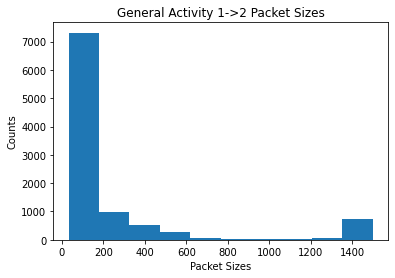

In [71]:
plt.hist(gen_dir_12)
plt.ylabel('Counts')
plt.title('General Activity 1->2 Packet Sizes')
plt.xlabel('Packet Sizes');

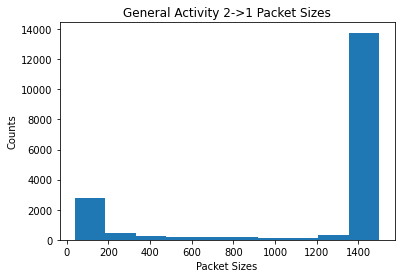

In [72]:
plt.hist(gen_dir_21)
plt.ylabel('Counts')
plt.title('General Activity 2->1 Packet Sizes')
plt.xlabel('Packet Sizes');

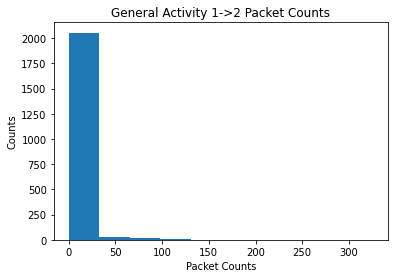

In [73]:
#Packet Counts
plt.hist(df1['1->2Pkts'])
plt.ylabel('Counts')
plt.title('General Activity 1->2 Packet Counts')
plt.xlabel('Packet Counts');

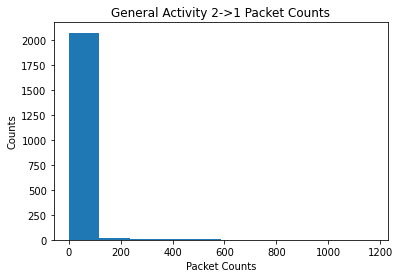

In [74]:
#Packet Counts
plt.hist(df1['2->1Pkts'])
plt.ylabel('Counts')
plt.title('General Activity 2->1 Packet Counts')
plt.xlabel('Packet Counts');

In [91]:
df1['avg_time_gaps'] = df1.apply(packet_time_gaps, axis=1)
df1_gaps = df1[df1['1->2Pkts']+df1['2->1Pkts'] > 1]

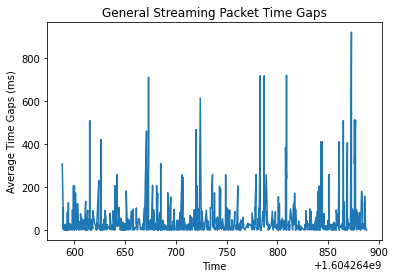

In [94]:
plt.plot(df1_gaps['Time'], df1_gaps['avg_time_gaps'])
plt.ylabel('Average Time Gaps (ms)')
plt.title('General Streaming Packet Time Gaps')
plt.xlabel('Time');

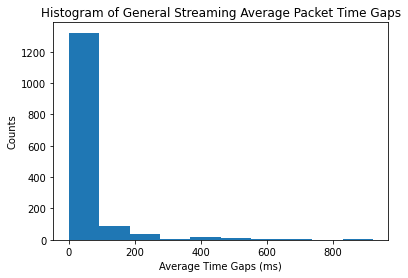

In [108]:
plt.hist(df1_gaps['avg_time_gaps'])
plt.xlabel('Average Time Gaps (ms)')
plt.title('Histogram of General Streaming Average Packet Time Gaps')
plt.ylabel('Counts');